In [87]:
import glob
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing and Loading the datasets

In [63]:
house = pd.concat([pd.read_csv(f) for f in glob.glob("./data/*.csv")], ignore_index=True)
house.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [64]:
house.shape

(933541, 11)

# Handling Null Values

In [65]:
house.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [66]:
house = house.drop(columns='remaining_lease',axis=1)

In [67]:
# droping remaining_lease missing values
house = house.dropna()
house.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [68]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,933541.0,95.686843,25.814587,28.0,73.0,93.0,113.0,366.7
lease_commence_date,933541.0,1988.343544,10.731207,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,933541.0,322777.326199,172327.338776,5000.0,194500.0,299800.0,420000.0,1588000.0


In [69]:
# checking the unique values in flat_type feature
house['flat_type'].value_counts()

flat_type
4 ROOM              355123
3 ROOM              297542
5 ROOM              196928
EXECUTIVE            70070
2 ROOM               12029
1 ROOM                1305
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [70]:
# checking the unique values in town feature
house['town'].value_counts()

town
TAMPINES           80412
YISHUN             70477
JURONG WEST        67113
BEDOK              66979
WOODLANDS          65984
ANG MO KIO         52353
HOUGANG            51075
BUKIT BATOK        44836
CHOA CHU KANG      38625
BUKIT MERAH        34600
PASIR RIS          33374
SENGKANG           32963
TOA PAYOH          31734
QUEENSTOWN         28935
GEYLANG            28347
CLEMENTI           28171
BUKIT PANJANG      27881
KALLANG/WHAMPOA    27420
JURONG EAST        24912
SERANGOON          22934
BISHAN             21365
PUNGGOL            21132
SEMBAWANG          14061
MARINE PARADE       8070
CENTRAL AREA        7193
BUKIT TIMAH         2531
LIM CHU KANG          64
Name: count, dtype: int64

In [71]:
house['storey_range'].value_counts()

storey_range
04 TO 06    234080
07 TO 09    211507
01 TO 03    187561
10 TO 12    180010
13 TO 15     62649
16 TO 18     24468
19 TO 21     11572
22 TO 24      7526
25 TO 27      3499
01 TO 05      2700
06 TO 10      2474
28 TO 30      1677
11 TO 15      1259
31 TO 33       653
34 TO 36       597
37 TO 39       518
16 TO 20       265
40 TO 42       250
21 TO 25        92
43 TO 45        66
46 TO 48        53
26 TO 30        39
49 TO 51        17
36 TO 40         7
31 TO 35         2
Name: count, dtype: int64

In [72]:
house['flat_model'].value_counts()

flat_model
Model A                   197289
Improved                  169726
New Generation            110850
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47448
Simplified                 34533
Apartment                  25790
Standard                   25318
SIMPLIFIED                 23258
Maisonette                 17605
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10212
APARTMENT                   9901
DBSS                        3372
Adjoined flat               1262
Model A-Maisonette          1104
MODEL A-MAISONETTE           982
Terrace                      449
Type S1                      444
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      219
2-room                       138
Premium Apartment Loft       113
Premium Maisonette            86
Improved-Maisonette           83

In [73]:
house.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [74]:
# Convert the 'month' column to a datetime format
house['month'] = pd.to_datetime(house['month'])

# Extract the year and month into separate columns
house['year'] = house['month'].dt.year
house['month_of_year'] = house['month'].dt.month
house

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month_of_year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
933536,2014-12-01,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,2014,12
933537,2014-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,2014,12
933538,2014-12-01,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,2014,12
933539,2014-12-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,2014,12


In [75]:
house.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
year                            int32
month_of_year                   int32
dtype: object

In [76]:
house['lease_commence_year'] = pd.to_datetime(house['lease_commence_date'],format = '%Y').dt.year
# Extract the year of lease commencement
#house['lease_commence_year'] = house['lease_commence_date'].dt.year

In [77]:
house

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month_of_year,lease_commence_year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,1977
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,1977
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1,1977
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1,1977
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933536,2014-12-01,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,2014,12,1988
933537,2014-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,2014,12,1988
933538,2014-12-01,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,2014,12,1992
933539,2014-12-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,2014,12,1985


In [78]:
house_new_data = house.copy()

In [79]:
house_new_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month_of_year,lease_commence_year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,1977
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,1977
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1,1977
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1,1977
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933536,2014-12-01,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,2014,12,1988
933537,2014-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,2014,12,1988
933538,2014-12-01,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,2014,12,1992
933539,2014-12-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,2014,12,1985


In [80]:
#  dropping the existing features 

house_new_data.drop(columns=['month','lease_commence_date'],inplace = True)

In [81]:
house_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,9000.0,1990,1,1977
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,6000.0,1990,1,1977
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,8000.0,1990,1,1977
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,6000.0,1990,1,1977
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,47200.0,1990,1,1976
...,...,...,...,...,...,...,...,...,...,...,...
933536,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,580000.0,2014,12,1988
933537,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,540000.0,2014,12,1988
933538,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,738000.0,2014,12,1992
933539,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,592000.0,2014,12,1985


### Data Preprocessing

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
encoder = LabelEncoder()
house_new_data['town'] = encoder.fit_transform(house_new_data['town'])
house_new_data['flat_type'] = encoder.fit_transform(house_new_data['flat_type'])
house_new_data['storey_range'] = encoder.fit_transform(house_new_data['storey_range'])
house_new_data['flat_model'] = encoder.fit_transform(house_new_data['flat_model'])

In [84]:
house_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year
0,0,0,309,ANG MO KIO AVE 1,5,31.0,7,9000.0,1990,1,1977
1,0,0,309,ANG MO KIO AVE 1,2,31.0,7,6000.0,1990,1,1977
2,0,0,309,ANG MO KIO AVE 1,5,31.0,7,8000.0,1990,1,1977
3,0,0,309,ANG MO KIO AVE 1,4,31.0,7,6000.0,1990,1,1977
4,0,2,216,ANG MO KIO AVE 1,2,73.0,20,47200.0,1990,1,1976
...,...,...,...,...,...,...,...,...,...,...,...
933536,26,4,816,YISHUN ST 81,5,122.0,9,580000.0,2014,12,1988
933537,26,5,325,YISHUN CTRL,5,146.0,15,540000.0,2014,12,1988
933538,26,5,618,YISHUN RING RD,4,164.0,5,738000.0,2014,12,1992
933539,26,5,277,YISHUN ST 22,4,152.0,15,592000.0,2014,12,1985


In [85]:
# after encoding descriptive statistics analaysis

house_new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
town,933541.0,13.656979,8.793279,0.0,5.0,13.0,23.0,26.0
flat_type,933541.0,3.014408,0.949238,0.0,2.0,3.0,4.0,7.0
storey_range,933541.0,3.413742,2.668642,0.0,2.0,4.0,5.0,24.0
floor_area_sqm,933541.0,95.686843,25.814587,28.0,73.0,93.0,113.0,366.7
flat_model,933541.0,15.716252,6.663173,0.0,9.0,16.0,21.0,33.0
resale_price,933541.0,322777.326199,172327.338776,5000.0,194500.0,299800.0,420000.0,1588000.0
year,933541.0,2006.290413,9.404258,1990.0,1999.0,2005.0,2014.0,2024.0
month_of_year,933541.0,6.553011,3.402489,1.0,4.0,7.0,9.0,12.0
lease_commence_year,933541.0,1988.343544,10.731207,1966.0,1981.0,1986.0,1996.0,2020.0


### Skewness Handling

In [88]:
# checking the outliars using boxplot distribution plot

def plot(house_new_data,column):
    plt.figure(figsize =(15,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = house_new_data ,x = column)
    plt.title(f'box plot for {column}')
    

    plt.subplot(1,3,2)
    sns.histplot(data = house_new_data ,x = column,kde = True ,bins = 40)
    plt.title(f'distribution  plot for {column}')
    plt.show()

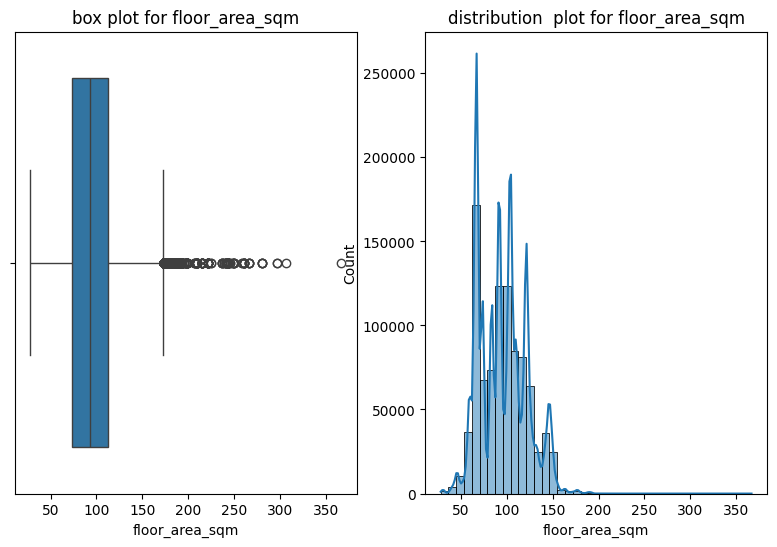

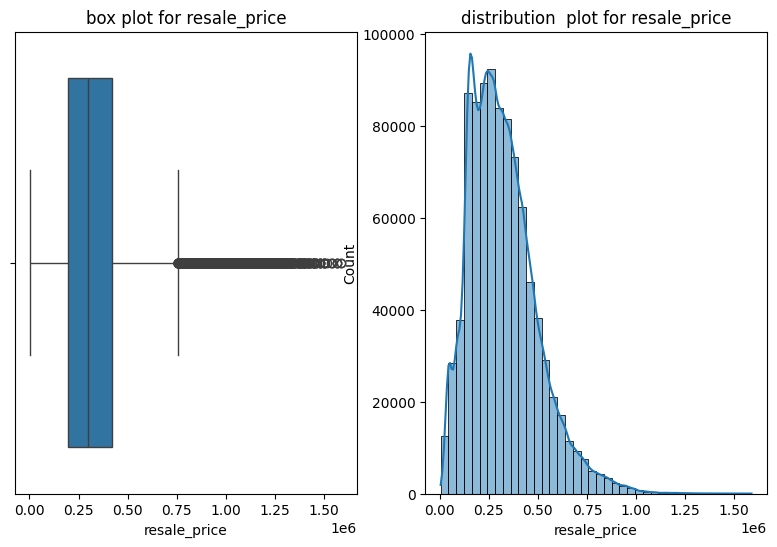

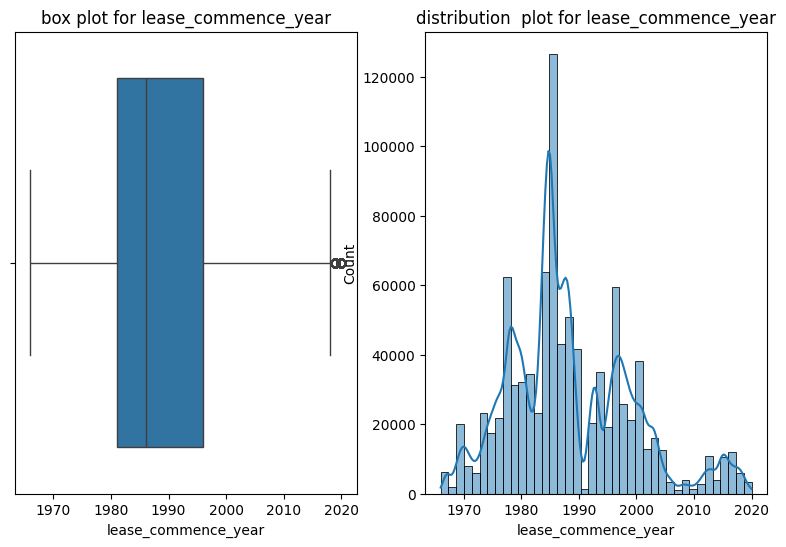

In [90]:
for i in ['floor_area_sqm','resale_price','lease_commence_year']:
    plot(house_new_data ,i)

In [91]:
# 'floor_area_sqm','resale_price' this two feature are skewd in data handling log method 


house_new_data['floor_area_sqm'] = np.log(house_new_data['floor_area_sqm'])
house_new_data['resale_price'] = np.log(house_new_data['resale_price'])
house_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year
0,0,0,309,ANG MO KIO AVE 1,5,3.433987,7,9.104980,1990,1,1977
1,0,0,309,ANG MO KIO AVE 1,2,3.433987,7,8.699515,1990,1,1977
2,0,0,309,ANG MO KIO AVE 1,5,3.433987,7,8.987197,1990,1,1977
3,0,0,309,ANG MO KIO AVE 1,4,3.433987,7,8.699515,1990,1,1977
4,0,2,216,ANG MO KIO AVE 1,2,4.290459,20,10.762149,1990,1,1976
...,...,...,...,...,...,...,...,...,...,...,...
933536,26,4,816,YISHUN ST 81,5,4.804021,9,13.270783,2014,12,1988
933537,26,5,325,YISHUN CTRL,5,4.983607,15,13.199324,2014,12,1988
933538,26,5,618,YISHUN RING RD,4,5.099866,5,13.511699,2014,12,1992
933539,26,5,277,YISHUN ST 22,4,5.023881,15,13.291262,2014,12,1985


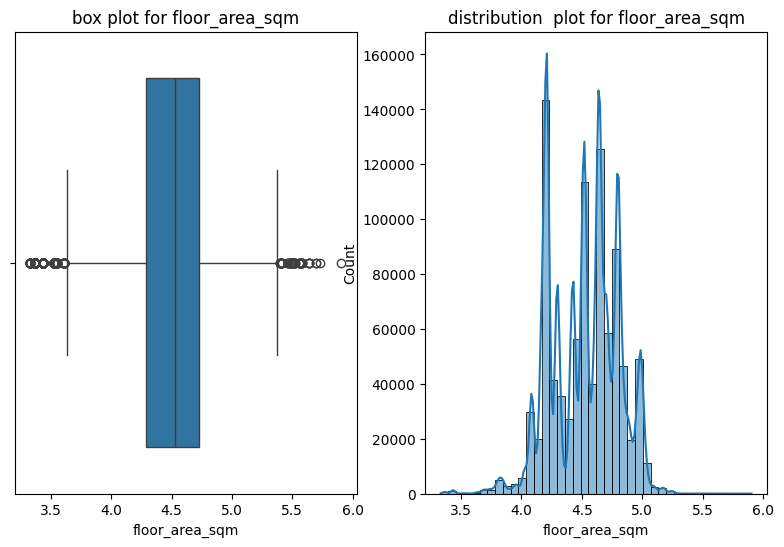

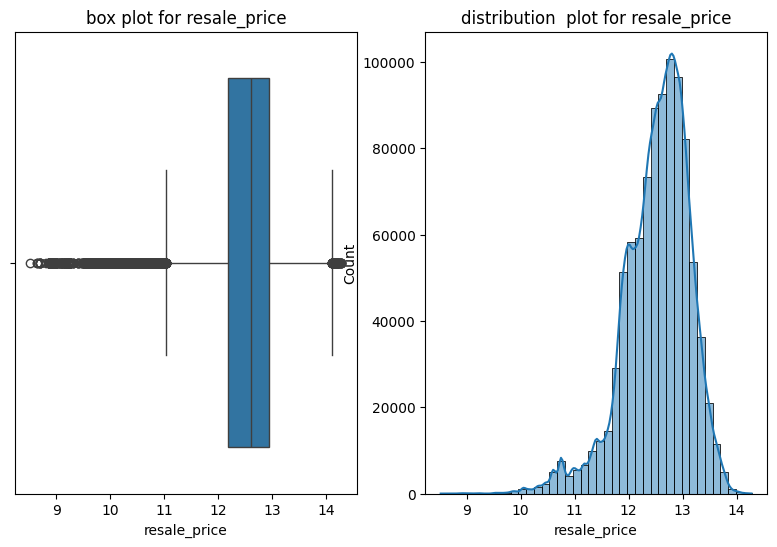

In [92]:
for i in ['floor_area_sqm','resale_price']:
    plot(house_new_data,i)

### Treat Outliers using IQR

In [93]:
#using the IQR & Clips  method removing the outliars :
# formula IQR = Q3_Q1
def outlier(house_new_data ,column):
    IQR = house_new_data[column].quantile(0.75)-house_new_data[column].quantile(0.25)
    upper_value = house_new_data[column].quantile(0.75)+1.5*IQR
    lower_value = house_new_data[column].quantile(0.25)-1.5*IQR
    
    house_new_data[column] =     house_new_data[column].clip(upper_value,lower_value)

outlier(house_new_data, 'floor_area_sqm')
outlier(house_new_data, 'resale_price')
house_new_data1 = house_new_data.copy()

In [94]:
house_new_data1

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year
0,0,0,309,ANG MO KIO AVE 1,5,3.635067,7,11.023454,1990,1,1977
1,0,0,309,ANG MO KIO AVE 1,2,3.635067,7,11.023454,1990,1,1977
2,0,0,309,ANG MO KIO AVE 1,5,3.635067,7,11.023454,1990,1,1977
3,0,0,309,ANG MO KIO AVE 1,4,3.635067,7,11.023454,1990,1,1977
4,0,2,216,ANG MO KIO AVE 1,2,4.290459,20,11.023454,1990,1,1976
...,...,...,...,...,...,...,...,...,...,...,...
933536,26,4,816,YISHUN ST 81,5,4.804021,9,13.270783,2014,12,1988
933537,26,5,325,YISHUN CTRL,5,4.983607,15,13.199324,2014,12,1988
933538,26,5,618,YISHUN RING RD,4,5.099866,5,13.511699,2014,12,1992
933539,26,5,277,YISHUN ST 22,4,5.023881,15,13.291262,2014,12,1985


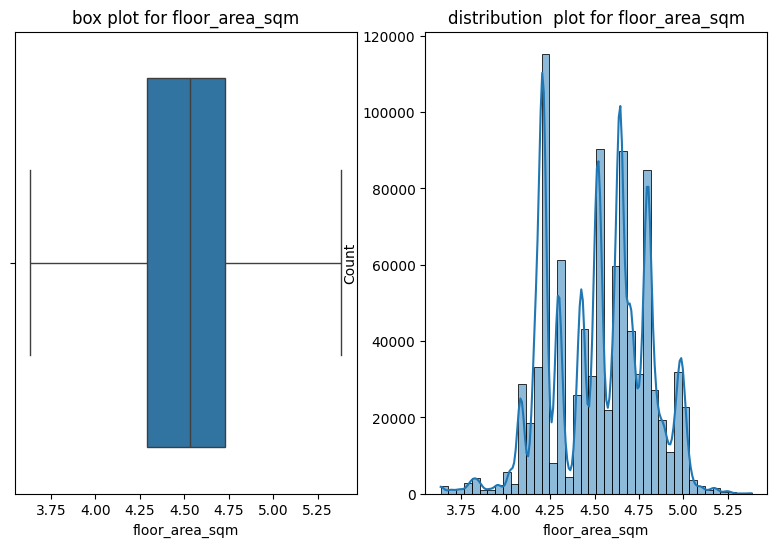

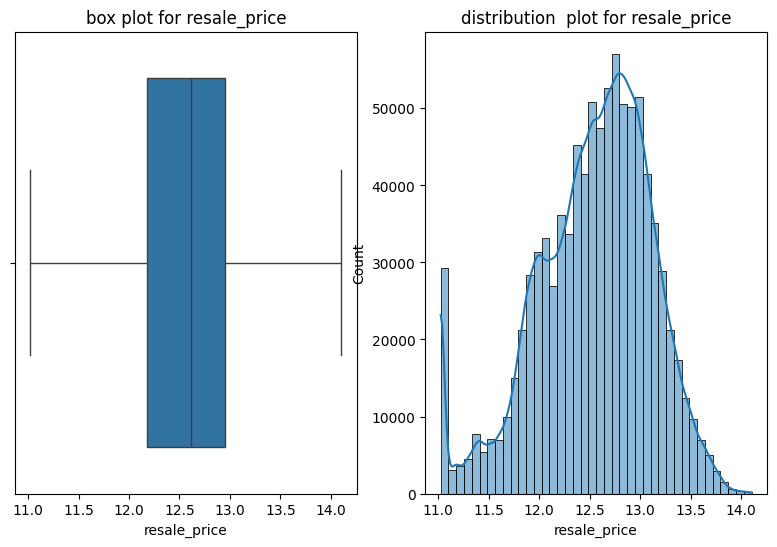

In [95]:
# after IQR using checking the skewness
for i in ['floor_area_sqm','resale_price']:
    plot(house_new_data1,i)

### EDA

<Axes: xlabel='resale_price', ylabel='flat_model'>

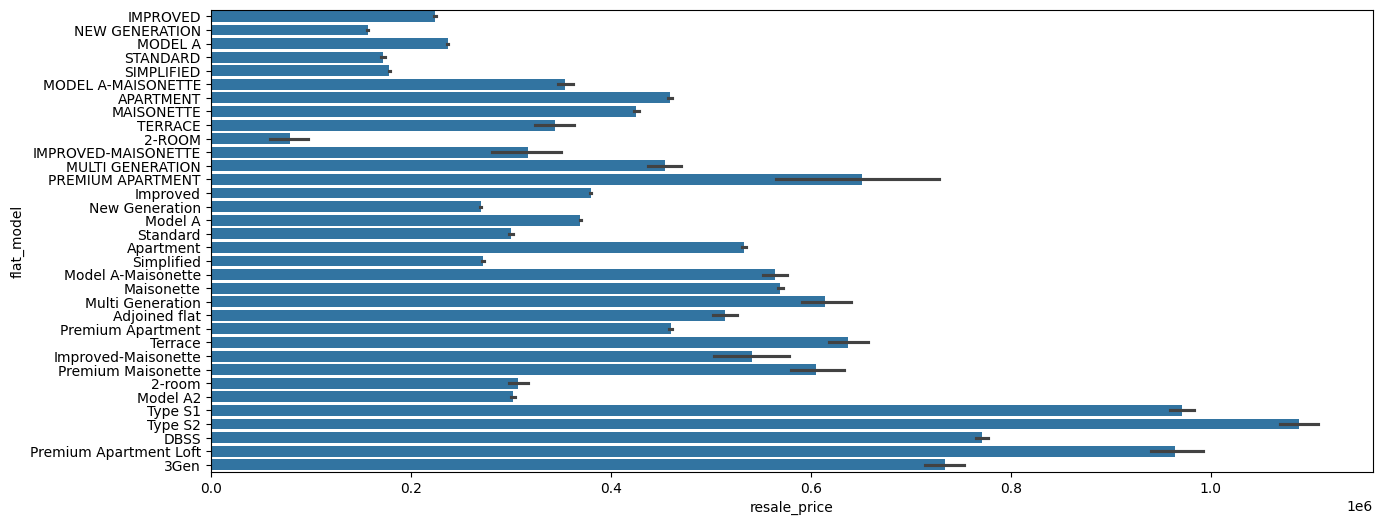

In [96]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_model', x= 'resale_price',data = house )

<Axes: xlabel='resale_price', ylabel='town'>

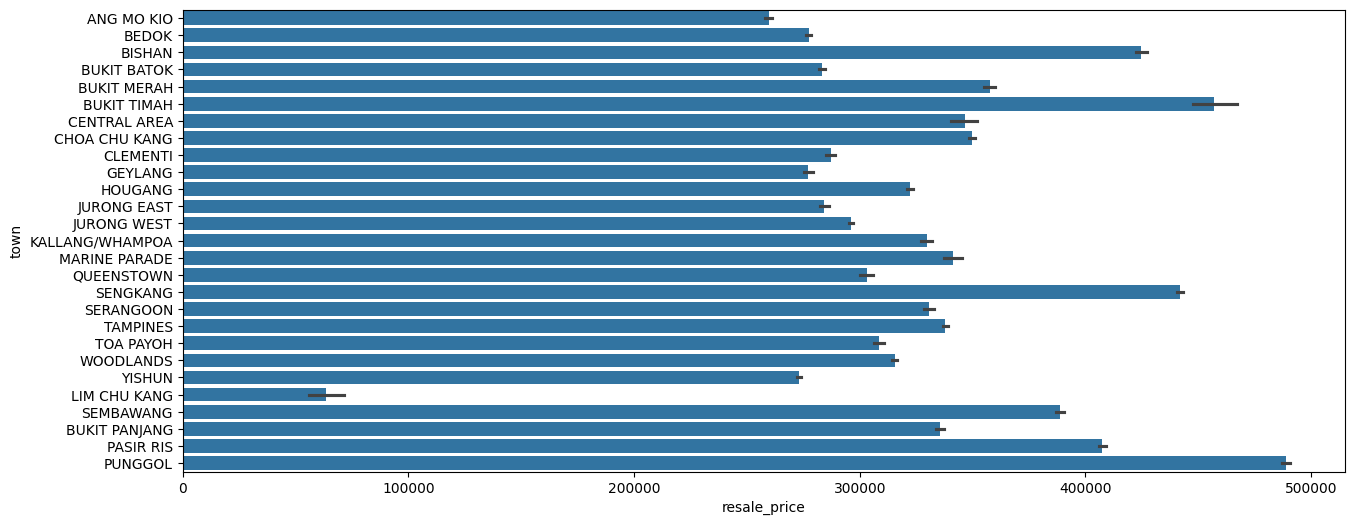

In [97]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'town', x= 'resale_price',data = house )

<Axes: xlabel='resale_price', ylabel='flat_type'>

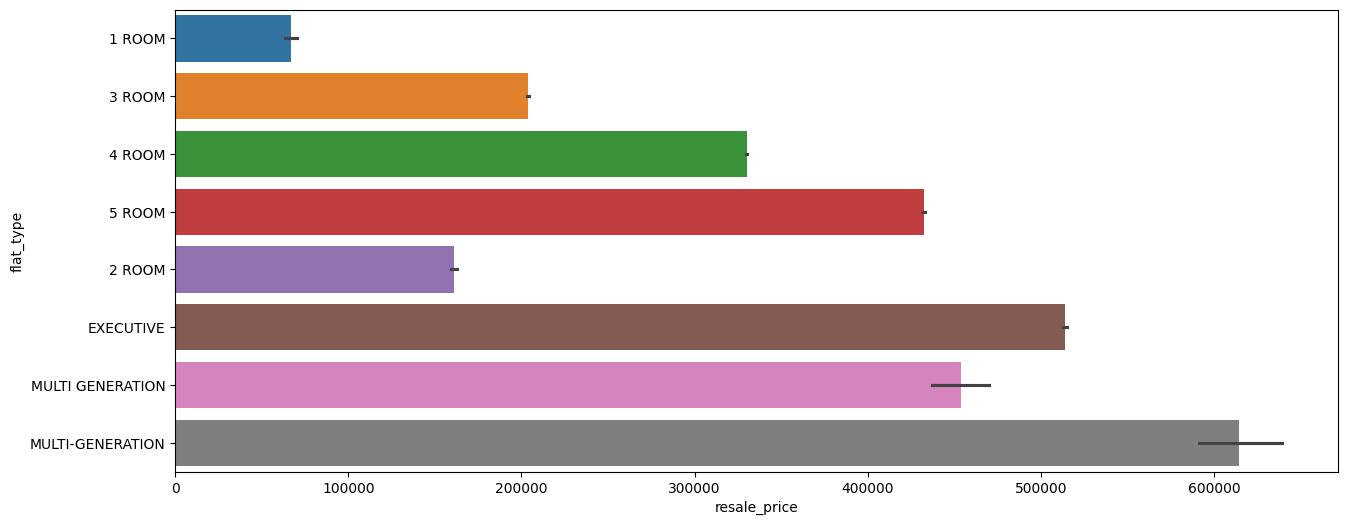

In [98]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_type', x= 'resale_price',data = house,hue='flat_type' )

<Axes: xlabel='resale_price', ylabel='floor_area_sqm'>

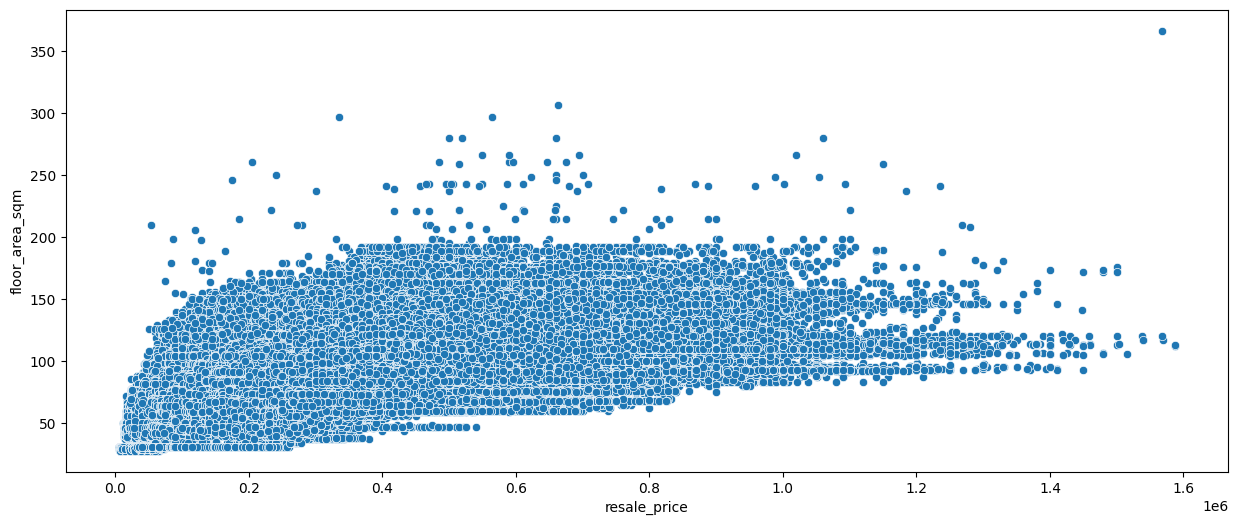

In [99]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'resale_price' ,y = 'floor_area_sqm',data = house)

<Axes: xlabel='lease_commence_year', ylabel='resale_price'>

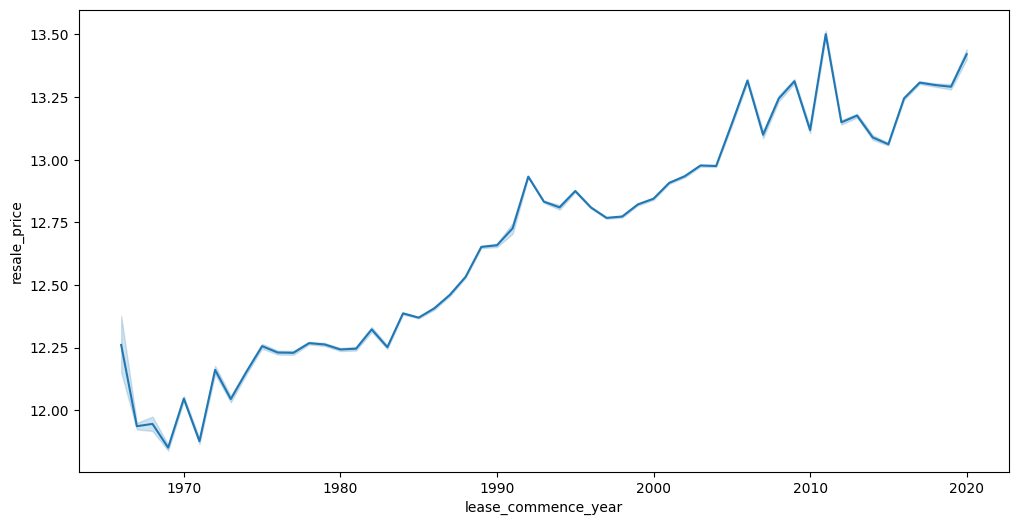

In [100]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'lease_commence_year' , y = 'resale_price', data = house_new_data)

<Axes: xlabel='year', ylabel='resale_price'>

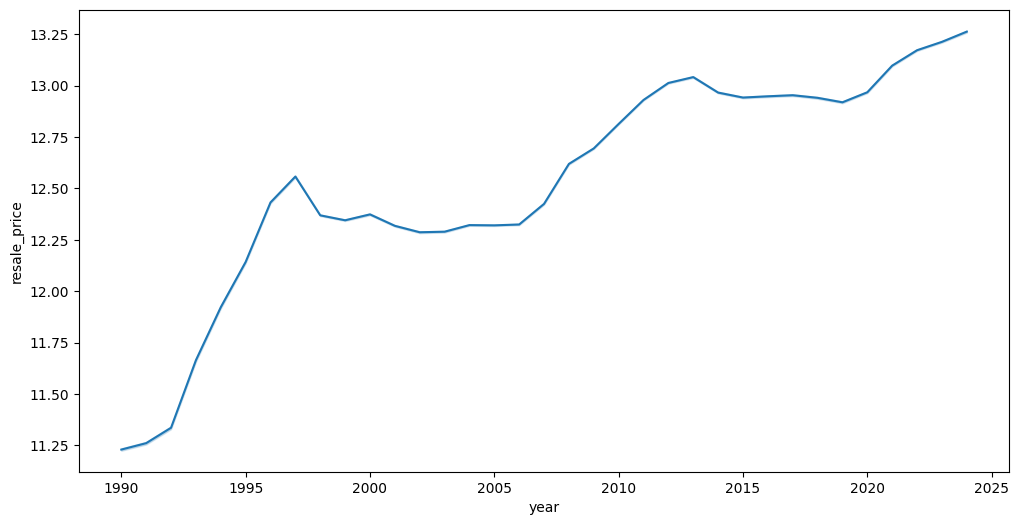

In [101]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'year', y = 'resale_price', data = house_new_data)

In [103]:
# dropping the irrelvent feature 
house_new_data1.drop(columns=['block','street_name'],inplace = True)
house_new_data1

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year
0,0,0,5,3.635067,7,11.023454,1990,1,1977
1,0,0,2,3.635067,7,11.023454,1990,1,1977
2,0,0,5,3.635067,7,11.023454,1990,1,1977
3,0,0,4,3.635067,7,11.023454,1990,1,1977
4,0,2,2,4.290459,20,11.023454,1990,1,1976
...,...,...,...,...,...,...,...,...,...
933536,26,4,5,4.804021,9,13.270783,2014,12,1988
933537,26,5,5,4.983607,15,13.199324,2014,12,1988
933538,26,5,4,5.099866,5,13.511699,2014,12,1992
933539,26,5,4,5.023881,15,13.291262,2014,12,1985


In [104]:
house_new_data1

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year
0,0,0,5,3.635067,7,11.023454,1990,1,1977
1,0,0,2,3.635067,7,11.023454,1990,1,1977
2,0,0,5,3.635067,7,11.023454,1990,1,1977
3,0,0,4,3.635067,7,11.023454,1990,1,1977
4,0,2,2,4.290459,20,11.023454,1990,1,1976
...,...,...,...,...,...,...,...,...,...
933536,26,4,5,4.804021,9,13.270783,2014,12,1988
933537,26,5,5,4.983607,15,13.199324,2014,12,1988
933538,26,5,4,5.099866,5,13.511699,2014,12,1992
933539,26,5,4,5.023881,15,13.291262,2014,12,1985


In [106]:
heat = house_new_data1.corr()
heat

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year
town,1.000000,0.136882,-0.047791,0.135976,-0.102308,0.084005,0.072092,0.003071,0.212878
flat_type,0.136882,1.000000,0.074183,0.940977,-0.359735,0.599540,0.100538,0.003494,0.404215
storey_range,-0.047791,0.074183,1.000000,0.049326,-0.068101,0.188152,0.105758,-0.002566,0.168792
floor_area_sqm,0.135976,0.940977,0.049326,1.000000,-0.362518,0.596215,0.074596,0.003097,0.417076
flat_model,-0.102308,-0.359735,-0.068101,-0.362518,1.000000,-0.180032,0.062732,-0.004905,-0.117171
resale_price,0.084005,0.599540,0.188152,0.596215,-0.180032,1.000000,0.692436,0.010561,0.536107
year,0.072092,0.100538,0.105758,0.074596,0.062732,0.692436,1.000000,-0.024339,0.433910
month_of_year,0.003071,0.003494,-0.002566,0.003097,-0.004905,0.010561,-0.024339,1.000000,0.004063
lease_commence_year,0.212878,0.404215,0.168792,0.417076,-0.117171,0.536107,0.433910,0.004063,1.000000


<Axes: >

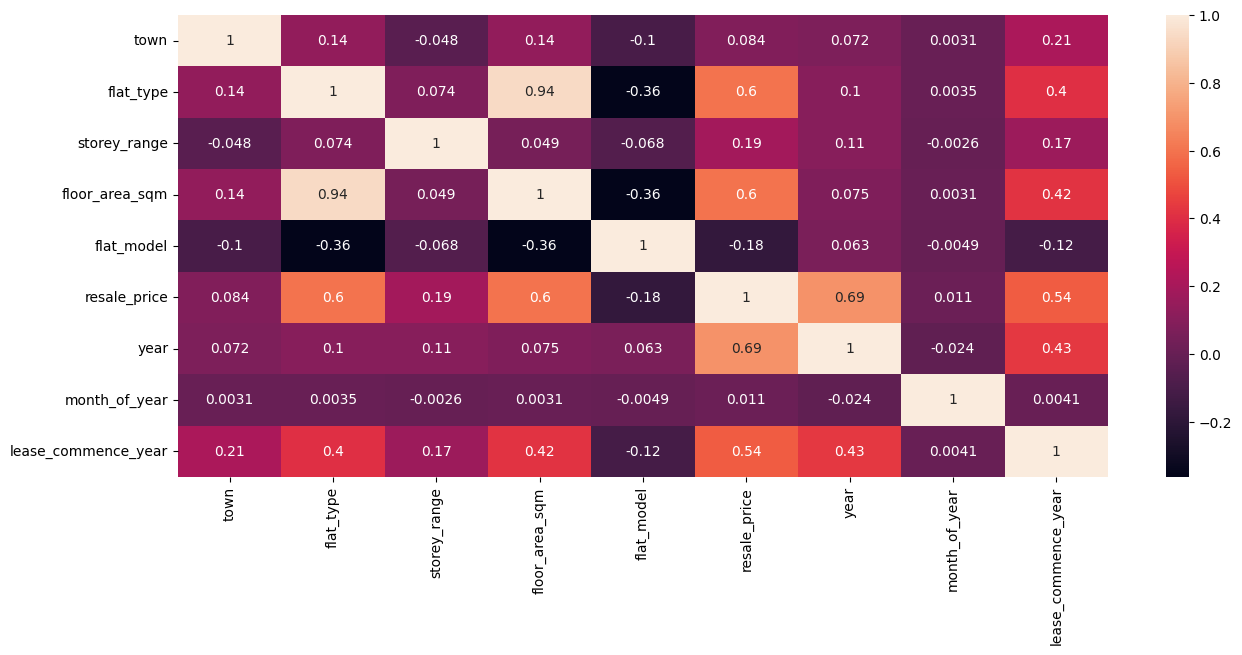

In [107]:
# Need to verify any columns are highly correlated using Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(heat,annot = True)

### Model Building

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [109]:
house_new_data1.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'year', 'month_of_year', 'lease_commence_year'],
      dtype='object')

In [111]:
x = house_new_data1[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
        'year', 'month_of_year', 'lease_commence_year']]
y = house_new_data1[['resale_price']]

In [112]:
#standardize the features of a dataset
encoder = StandardScaler()

encoder.fit_transform(x)

array([[-1.55311642, -3.17561053,  0.59440681, ..., -1.73223883,
        -1.63204456, -1.05706184],
       [-1.55311642, -3.17561053, -0.52976106, ..., -1.73223883,
        -1.63204456, -1.05706184],
       [-1.55311642, -3.17561053,  0.59440681, ..., -1.73223883,
        -1.63204456, -1.05706184],
       ...,
       [ 1.40368877,  2.09177704,  0.21968418, ...,  0.81979795,
         1.60088469,  0.34073132],
       [ 1.40368877,  2.09177704,  0.21968418, ...,  0.81979795,
         1.60088469, -0.31157216],
       [ 1.40368877,  2.09177704, -0.52976106, ...,  0.81979795,
         1.60088469, -0.31157216]])

In [113]:
#check the accuracy of training and testing using metrics RandomForestRegressor


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

RFR= RandomForestRegressor(n_estimators= 50 ,random_state = 0)

# fitting the model: 

RFR.fit(x_train,y_train)

y_pred_train = RFR.predict(x_train)
y_pred_test = RFR.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9958983095804336, 0.9813304104929037)

In [ ]:
# we got good accuracy after oversampling
# RandomForestRegressor have good testing accuracy, but in training accuracy is overfitting.

In [115]:
# GridsearchCV is a cross validation function
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

param = {'max_depth'        : [20],
              'min_samples_split': [ 5, ],
              'min_samples_leaf' : [ 2, ],
              'max_features'     : ['log2']}
grid_searchcv = GridSearchCV(RandomForestRegressor(),param_grid = param,  cv = 5)
grid_searchcv.fit(x_train, y_train)

c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:1

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20], 'max_features': ['log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5]})

In [116]:
grid_searchcv.best_score_

np.float64(0.9779268921119201)

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 

Hyper_model.fit(x_train,y_train)

y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9838651858274219, 0.9782456489830841)

In [118]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [119]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 

Hyper_model.fit(x_train,y_train)

y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.0072392042508436704
Mean Absolute Error: 0.0614553413078832
Root Mean Squared Error: 0.08508351339033708
0.9783928469845011


In [120]:
# manually passed the user input and predict the selling price

user_data = np.array([[0,1,3,3.785069,5,2017,1,1979]])
y_prediction = Hyper_model.predict(user_data)
y_prediction[0]

c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(12.214048564754385)

In [121]:
user_data = np.array([[4,3,2,4.785069,4,2023,3,1989]])

y_prediction = Hyper_model.predict(user_data)
y_prediction[0]

c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(13.467541401096257)

In [122]:
# using Inverse Log Transformation to convert the value to original re sale price of the data (exp)
np.exp(y_prediction[0])

np.float64(706120.6548510756)

In [123]:
# save the regression model by using pickle

with open("house_price_model.pkl", 'wb') as f:
    pickle.dump(Hyper_model, f)

In [124]:
# load the model
with open("house_price_model.pkl", 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[4, 3, 2, 4.785069, 4, 2023, 3, 1989]])
prediction = model.predict(user_data)
predicted_price = prediction[0]
predicted_price
np.exp(predicted_price)

c:\Users\kpaps\Desktop\Singapore_resale_flat_Analysis\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(706120.6548510756)